In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Total precision 

1. Generate 3 distributions with slightly different location (shift) to simulate the difference between fast/slow scan direction
2. Concatenate 3 distributions and make it into 1 wider and larger(in size) distribution
3. The shift will play a raw in P_initial, larger shift will give larger P_initial (Std_raw)
4. The scaling law remains valid

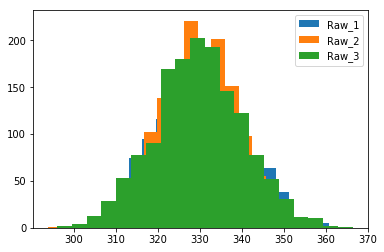

Raw precision =  10.333806607790484 9.045564711306138 10.595631782422734
Raw mean =  330.2421541328586 329.7412088179519 329.70023340967794
Raw_conc precision =  10.017639673927446
Raw_avg precision =  5.642214620555379


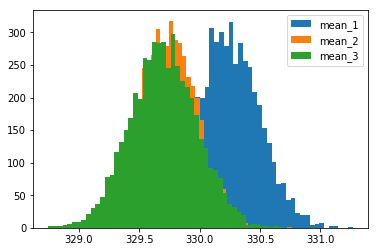

Avg mean_1 =  330.2339152527076
Avg mean_2 =  329.7416157673254
Avg mean_3 =  329.6992415689324

Final conc precision =  0.3555673455521012
Initial avg precision/sqrt(sample size) =  0.14716039152207774
Initial conc precision/sqrt(sample size) =  0.26128034392232186


In [2]:
size = 1470
shift = 0
Raw_1 = np.random.normal(loc=330+shift, scale=10.32, size=size)
#Raw_1 = np.random.normal(loc=330+shift, scale=8.85, size=size)
Raw_2 = np.random.normal(loc=330, scale=8.85, size=size)
Raw_3 = np.random.normal(loc=330-shift, scale=10.44, size=size)
#Raw_3 = np.random.normal(loc=330-shift, scale=8.85, size=size)

plt.figure()
plt.hist(Raw_1,bins=20, label='Raw_1')
plt.hist(Raw_2,bins=20, label='Raw_2')
plt.hist(Raw_3,bins=20, label='Raw_3')
plt.legend()
plt.show()
print('Raw precision = ',np.std(Raw_1),np.std(Raw_2),np.std(Raw_3))
print('Raw mean = ',np.mean(Raw_1),np.mean(Raw_2),np.mean(Raw_3))
print('Raw_conc precision = ', np.std(np.concatenate((Raw_1, Raw_2, Raw_3))))
print('Raw_avg precision = ', np.std((Raw_1+Raw_2+Raw_3)/3))

iterations=5000
mean_1_list = []
mean_2_list = []
mean_3_list = []
for i in range(iterations):
    Bs_Raw_1 = []
    Bs_Raw_2 = []
    Bs_Raw_3 = []
    num = np.random.randint(0,len(Raw_1),size=len(Raw_1))
    
    
    for index in num:
        Bs_Raw_1.append(Raw_1[index])
        Bs_Raw_2.append(Raw_2[index])
        Bs_Raw_3.append(Raw_3[index])
    mean_1_list.append(np.mean(Bs_Raw_1))
    mean_2_list.append(np.mean(Bs_Raw_2))
    mean_3_list.append(np.mean(Bs_Raw_3))

plt.figure()    
plt.hist(mean_1_list,label='mean_1',bins=50)
plt.hist(mean_2_list,label='mean_2',bins=50)
plt.hist(mean_3_list,label='mean_3',bins=50)
plt.legend()
plt.show()

print('Avg mean_1 = ', np.mean(mean_1_list))
print('Avg mean_2 = ', np.mean(mean_2_list))
print('Avg mean_3 = ', np.mean(mean_3_list))
Total_mean = np.concatenate((mean_1_list, mean_2_list, mean_3_list))    

print('\nFinal conc precision = ', np.std(Total_mean))
print('Initial avg precision/sqrt(sample size) = ', np.std((Raw_1+Raw_2+Raw_3)/3)/np.sqrt(size))
print('Initial conc precision/sqrt(sample size) = ', np.std(np.concatenate((Raw_1, Raw_2, Raw_3)))/np.sqrt(size))




In [3]:
print('Precision mean_1 = ',np.std(mean_1_list))
print('Precision mean_2 = ',np.std(mean_2_list))
print('Precision mean_3 = ',np.std(mean_3_list))

Precision mean_1 =  0.2635557737946265
Precision mean_2 =  0.23873784919050328
Precision mean_3 =  0.27595332411963713


### Avg precision

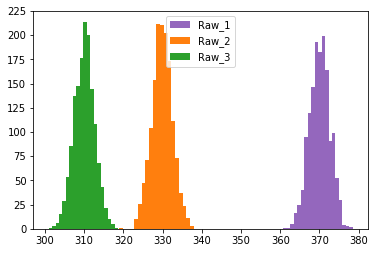

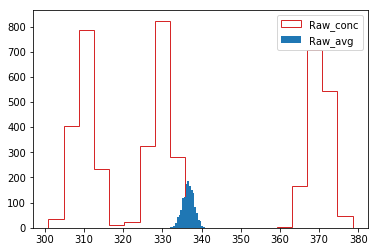

Raw_avg precision =  1.4757716608549716
Raw_avg mean =  336.66415417511087

Final precision =  0.038220787787748164
Initial precision/sqrt(sample size) =  0.038491115637006273
Mean of Bootstrapped means =  336.66431182001037


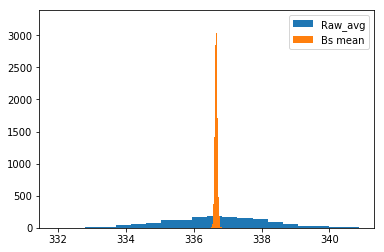

In [12]:
#sigma=6*1.732
sigma=1.5*1.732
#size = 1470
size = 1470
shift = 20
Raw_1 = np.random.normal(loc=330+2*shift, scale=sigma, size=size)
Raw_2 = np.random.normal(loc=330, scale=sigma, size=size)
Raw_3 = np.random.normal(loc=330-shift, scale=sigma, size=size)

plt.figure()
plt.hist(Raw_1,bins=20, label='Raw_1',color='C4')
plt.hist(Raw_2,bins=20, label='Raw_2',color='C1')
plt.hist(Raw_3,bins=20, label='Raw_3',color='C2')
Raw = (Raw_1+Raw_2+Raw_3)/3
Raw_conc = np.concatenate((Raw_1,Raw_2,Raw_3))
plt.legend()
plt.show()

plt.figure()
plt.hist(Raw_conc, bins=20, label='Raw_conc',histtype='step', color='C3' )
plt.hist(Raw, bins=20, label='Raw_avg', color='C0')
plt.legend()
plt.show()

plt.figure()
plt.hist(Raw,bins=20, label='Raw_avg')
print('Raw_avg precision = ',np.std(Raw))
print('Raw_avg mean = ',np.sum(Raw)/len(Raw))

iterations=20000
mean_list = []
for i in range(iterations):
    Bs_Raw = []
    num = np.random.randint(0,len(Raw),size=len(Raw)) 
    
    
    for index in num:
        Bs_Raw.append(Raw[index])
    mean_list.append(np.sum(Bs_Raw)/len(Bs_Raw))

print('\nFinal precision = ', np.std(mean_list))
print('Initial precision/sqrt(sample size) = ', np.std(Raw)/np.sqrt(len(Raw)))
print('Mean of Bootstrapped means = ',np.sum(mean_list)/len(mean_list))

plt.hist(mean_list,bins=20, label='Bs mean')
plt.legend()
plt.show()



### Toy model

Raw precision =  5.864433154864188
Raw mean =  329.8541172588286

Final Bs precision =  0.1543633540234431
Initial precision/sqrt(sample size) =  0.15295630123334777
Mean of Bootstrapped means =  329.85939437552963

Sampling dist. Precision =  0.15666399351187227
Sampling dist. mean =  330.00047748594403


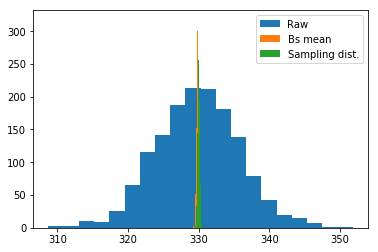

In [5]:
sigma=6
size = 1470
Raw = np.random.normal(loc=330, scale=sigma, size=size)


plt.figure()
plt.hist(Raw,bins=20, label='Raw')
print('Raw precision = ',np.std(Raw))
print('Raw mean = ',np.sum(Raw)/len(Raw))


iterations=2000
mean_list = []
sample_mean_list = []
for i in range(iterations):
    Bs_Raw = []
    num = np.random.randint(0,len(Raw),size=len(Raw)) 
    Raw_sample = np.random.normal(loc=330, scale=sigma, size=size)
    sample_mean_list.append(np.mean(Raw_sample))
    
    for index in num:
        Bs_Raw.append(Raw[index])
    mean_list.append(np.sum(Bs_Raw)/len(Bs_Raw))

print('\nFinal Bs precision = ', np.std(mean_list))
print('Initial precision/sqrt(sample size) = ', np.std(Raw)/np.sqrt(len(Raw)))
print('Mean of Bootstrapped means = ',np.sum(mean_list)/len(mean_list))

print('\nSampling dist. Precision = ', np.std(sample_mean_list))
print('Sampling dist. mean = ', np.mean(sample_mean_list))
plt.hist(mean_list,bins=20, label='Bs mean')
plt.hist(sample_mean_list, bins=20, label='Sampling dist.')
plt.legend()
plt.show()

